Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.


Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?



## First set seed value, for reproducabilty
### Question: What does comet not find the git repository and what would it do if found?: 
### Question: Is this not implemented correctly because result is not reproduced (see "rerun" notebook)

In [1]:
import os

os.environ["COMET_GIT_DIRECTORY"]="https://github.com/cruzer42/Comet"

In [2]:
# Only need to provide API key once..
#import comet_ml
#comet_ml.init()

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
#    api_key="",
    project_name="HappyCust",
    workspace="cruzer42",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'https://github.com/cruzer42/Comet' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/cruzer42/happycust/89abfd5977ea4c55807d7bae29c21bc7



In [4]:
# Pick a seed
seed_value = 52

In [5]:
import os
os.environ['PYTHONHASHSEED']=str(seed_value)


In [6]:
import random
random.seed(seed_value)


In [7]:
# import libraries
import pandas as pd
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [8]:
# Import scikit-learn tools, grid search cross validation, and classifiers

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
#import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint, uniform
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

# import Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

# import stacking classifier
from sklearn.ensemble import StackingClassifier

from sklearn.neighbors import KNeighborsClassifier

In [10]:
# load the dataset
customer_data = pd.read_csv('ACME-HappinessSurvey2020.csv')
customer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


## SHIFT the scale from 1-5 such that 3 becomes 0 at the center

In [12]:
customer_data['X1'] = customer_data['X1'] - 3
customer_data['X2'] = customer_data['X2'] - 3
customer_data['X3'] = customer_data['X3'] - 3
customer_data['X4'] = customer_data['X4'] - 3
customer_data['X5'] = customer_data['X5'] - 3
customer_data['X6'] = customer_data['X6'] - 3

In [13]:
# rename the columns
customer_data = customer_data.rename(columns = {'Y': 'Happy', 'X1':'DeliveredOnTime', 'X2':'ContentsCorrect', 'X3':'I ordered everything', 'X4': 'GoodPrice', 'X5':'CourierSatisfaction', 'X6': 'AppEasyOrdering'})
#ADDING A NEW FEATURE 'AVG' below
column_list = ['DeliveredOnTime', 'ContentsCorrect', 'I ordered everything', 'GoodPrice', 'CourierSatisfaction', 'AppEasyOrdering']
customer_data['AvgSurvey'] = customer_data[column_list].mean(axis=1)
##ADDING A NEW FEATURE 'AVG' above
customer_data.head()

,Happy,DeliveredOnTime,ContentsCorrect,I ordered everything,GoodPrice,CourierSatisfaction,AppEasyOrdering,AvgSurvey
0,0,0,0,0,1,-1,1,0.166667
1,0,0,-1,0,2,1,0,0.333333
2,1,2,0,0,0,0,2,0.666667
3,0,2,1,0,0,0,2,0.833333
4,0,2,1,0,0,0,2,0.833333


In [14]:
customer_data.describe()

,Happy,DeliveredOnTime,ContentsCorrect,I ordered everything,GoodPrice,CourierSatisfaction,AppEasyOrdering,AvgSurvey
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,1.333333,-0.468254,0.309524,0.746032,0.650794,1.253968,0.637566
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311,0.566109
min,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.166667
25%,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.333333
50%,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.666667
75%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [15]:
# checking for duplicate data
customer_data.duplicated().sum()

16

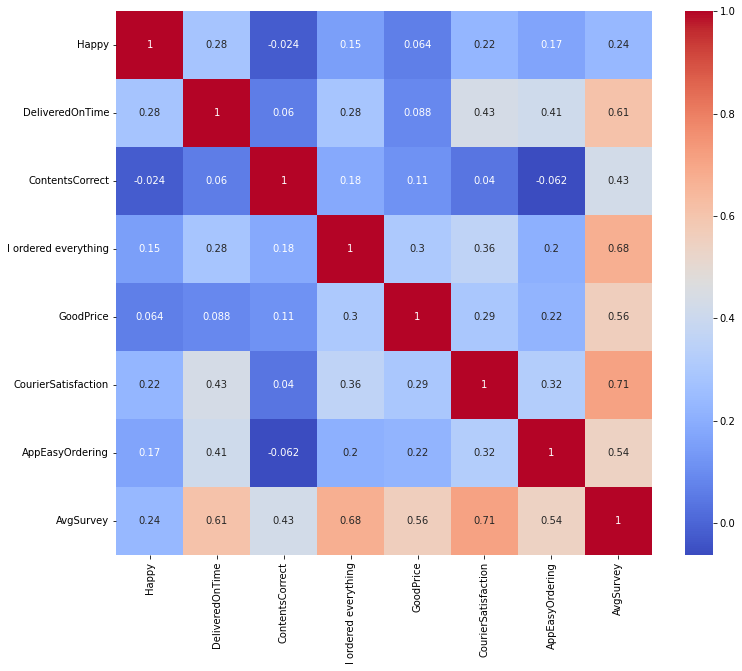

In [16]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = customer_data.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [17]:
# Correlation with output variable
cor_target = cor["Happy"]
# Selecting highly positively correlated features
cor_target

Happy                   1.000000
DeliveredOnTime         0.280160
ContentsCorrect        -0.024274
I ordered everything    0.150838
GoodPrice               0.064415
CourierSatisfaction     0.224522
AppEasyOrdering         0.167669
AvgSurvey               0.235885
Name: Happy, dtype: float64

In [18]:
# Correlation with output variable
cor_Courier = cor["CourierSatisfaction"]
# Selecting highly positively correlated features
cor_Courier

Happy                   0.224522
DeliveredOnTime         0.432772
ContentsCorrect         0.039996
I ordered everything    0.358397
GoodPrice               0.293115
CourierSatisfaction     1.000000
AppEasyOrdering         0.320195
AvgSurvey               0.712786
Name: CourierSatisfaction, dtype: float64

## Exploratory Data Analysis led to shifting the data to be centered around 0 instead of 3. In additon to plotting the feature response frequencies, the SUM of all features seems to reveal an inflection point. In order to include it as an additonal feature, we can scale it by using the Average instead of the Sum.

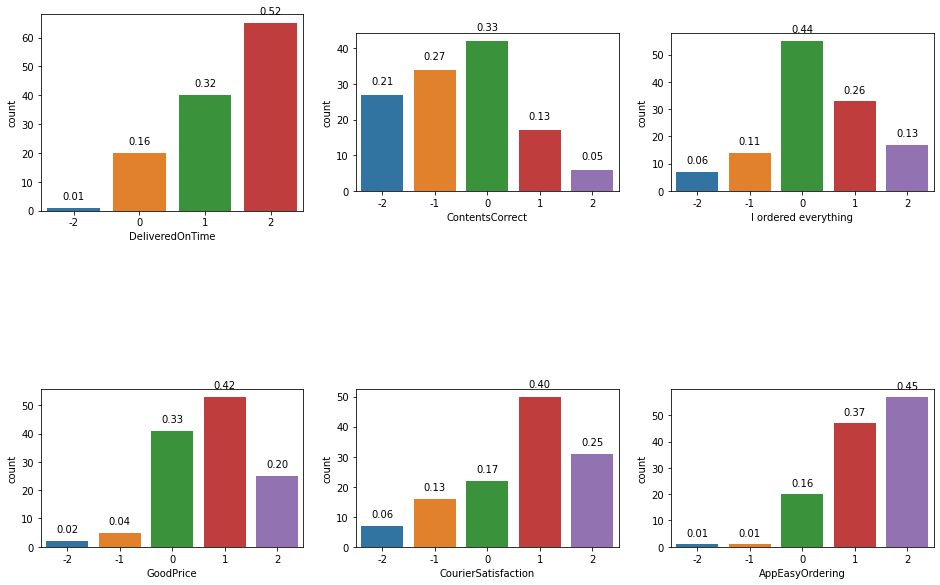

In [19]:
# Create a function for distribution plot
def count_plot(column_name, dataset, x=0, y=0):
    ax = sns.countplot(x=column_name, data= dataset, ax = axes[x, y])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(dataset))),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))
        
# Distribution of other variables
fig, axes =plt.subplots(2,3, figsize=(16, 12))
count_plot('DeliveredOnTime', customer_data, x = 0, y= 0)
count_plot('ContentsCorrect', customer_data, x = 0, y= 1)
count_plot('I ordered everything', customer_data, x = 0, y= 2)
count_plot('GoodPrice', customer_data, x = 1, y= 0)
count_plot('CourierSatisfaction', customer_data, x = 1, y= 1)
count_plot('AppEasyOrdering', customer_data, x = 1, y= 2)

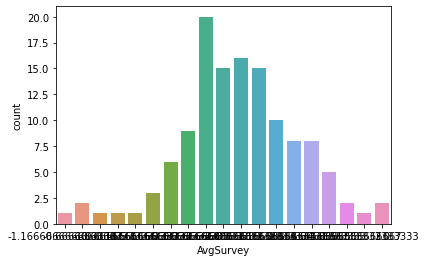

In [20]:
ax = sns.countplot(x="AvgSurvey", data=customer_data)

## Set the train, test, split test size (after experimenting with different test size values). Also use the seed value as defined in order to set it globally. 

In [21]:
#set predictor variables and target variables
X = customer_data.drop(columns= ['Happy'])
y = customer_data.Happy

In [22]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed_value, test_size=0.2)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 100
X Testing set sample size: 26
y Training set sample size: 100
y Testing set sample size: 26


In [23]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred_proba = model.predict_proba(X_test)[:,1]
    
    f1 = f1_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    roc= roc_auc_score(y_test, y_test_pred_proba)

    print("TRAINIG RESULTS: \n===============================")
    print(f"RECALL SCORE:{recall_score(y_train, y_train_pred):.4f}")
    print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    print()

    print("TESTING RESULTS: \n===============================")
    print(f"RECALL SCORE:{recall_score(y_test, y_test_pred):.4f}")
    print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
    print('F1-score: ' , round(f1,4))
#    print("Best Score: " , round(model.best_score_,4))
    print("Test ROC AUC:", round(roc,4), '\n')
#    print("Best Parameters: " , model.best_params_)
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [24]:
%%time
#Run Random Forest Classifier with default settings, before scaling and tuning 
rc = RandomForestClassifier()

rc.fit(X_train, y_train)

rc_predict = rc.predict(X_test)

#print (confusion_matrix(y_test , rc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rc_predict))
#print("F1 score: ", f1_score(y_test , rc_predict))
#print("Precision score: " , precision_score(y_test , rc_predict))
#print("Recall score: " , recall_score(y_test , rc_predict))
#print (classification_report(y_test , rc_predict))
rc

CPU times: user 206 ms, sys: 9.39 ms, total: 216 ms
Wall time: 233 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### This is the default RandomForest model with no standard scaling, but manually shifted to be centered around zero. Not only does it makes sense, but it improves both test and train scores.

#### Also no feature selection yet, but includes new feature "Average". This is a high scoring result, even better than some initial tweaking. 


TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5385
CONFUSION MATRIX:
[[6 8]
 [4 8]]
F1-score:  0.5714
Test ROC AUC: 0.5893 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.600000   0.500000  0.538462   0.550000      0.553846
recall      0.428571   0.666667  0.538462   0.547619      0.538462
f1-score    0.500000   0.571429  0.538462   0.535714      0.532967
support    14.000000  12.000000  0.538462  26.000000     26.000000


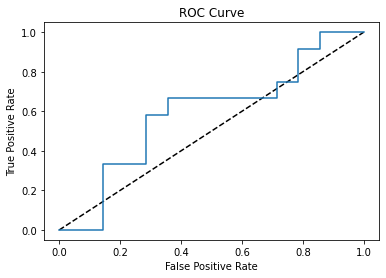

In [25]:
evaluate(rc, X_train, X_test, y_train, y_test)

In [26]:
%%time
#lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

#print (confusion_matrix(y_test , lr_predict))
#print ("Accuracy score: ", accuracy_score(y_test , lr_predict))
#print("F1 score: ", f1_score(y_test , lr_predict))
#print("Precision score: " , precision_score(y_test , lr_predict))
#print("Recall score: " , recall_score(y_test , lr_predict))
#print (classification_report(y_test , lr_predict))
lr

CPU times: user 7.82 ms, sys: 450 µs, total: 8.27 ms
Wall time: 8.5 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

TRAINIG RESULTS: 
RECALL SCORE:0.7719
ACCURACY SCORE:0.6900
CONFUSION MATRIX:
[[25 18]
 [13 44]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.657895   0.709677      0.69    0.683786      0.687411
recall      0.581395   0.771930      0.69    0.676663      0.690000
f1-score    0.617284   0.739496      0.69    0.678390      0.686945
support    43.000000  57.000000      0.69  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.5000
ACCURACY SCORE:0.3462
CONFUSION MATRIX:
[[ 3 11]
 [ 6  6]]
F1-score:  0.4138
Test ROC AUC: 0.3631 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.333333   0.352941  0.346154   0.343137      0.342383
recall      0.214286   0.500000  0.346154   0.357143      0.346154
f1-score    0.260870   0.413793  0.346154   0.337331      0.331450
support    14.000000  12.000000  0.346154  26.000000     26.000000


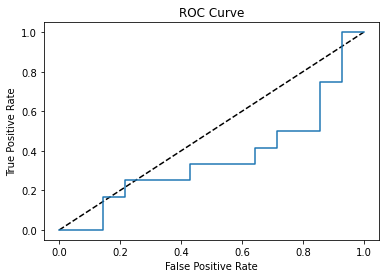

In [27]:
evaluate(lr, X_train, X_test, y_train, y_test)

In [28]:
%%time
# RUN THE PIPELINE WITH DEFAULT PARAMETERS BEFORE USING STANDARD SCALER
# Setup the pipeline
steps = [
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

#steps = [('scaler', StandardScaler()),
#         ('rfc', RandomForestClassifier(n_estimators=10))
#         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['gini']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
#print (confusion_matrix(y_test , rfc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
#print("F1 score: ", f1_score(y_test , rfc_predict))
#print("Precision score: " , precision_score(y_test , rfc_predict))
#print("Recall score: " , recall_score(y_test , rfc_predict))
#print (classification_report(y_test , rfc_predict))
rfc

COMET ERROR: Failed to extract parameters from estimator


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'gini', 'rfc__max_depth': None}
Tuned Logistic Regression Accuracy: 0.5700000000000001
CPU times: user 345 ms, sys: 119 ms, total: 464 ms
Wall time: 5.59 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

### Check the pipleline results using default parameters to baseline. Check this more carefully later for an explanation. A difference was observed for using the pipleline with same parameters in scenarios, with and with Avg and shifting.

TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5769
CONFUSION MATRIX:
[[7 7]
 [4 8]]
F1-score:  0.5926
Test ROC AUC: 0.5774 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.636364   0.533333  0.576923   0.584848      0.588811
recall      0.500000   0.666667  0.576923   0.583333      0.576923
f1-score    0.560000   0.592593  0.576923   0.576296      0.575043
support    14.000000  12.000000  0.576923  26.000000     26.000000


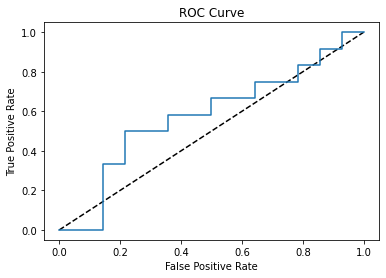

In [29]:
evaluate(rfc, X_train, X_test, y_train, y_test)

In [30]:
%%time
# using STANDARD SCALER
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

#steps = [('scaler', StandardScaler()),
#         ('rfc', RandomForestClassifier(n_estimators=10))
#         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['gini']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
#print (confusion_matrix(y_test , rfc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
#print("F1 score: ", f1_score(y_test , rfc_predict))
#print("Precision score: " , precision_score(y_test , rfc_predict))
#print("Recall score: " , recall_score(y_test , rfc_predict))
#print (classification_report(y_test , rfc_predict))
rfc

COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'gini', 'rfc__max_depth': None}
Tuned Logistic Regression Accuracy: 0.5800000000000001
CPU times: user 345 ms, sys: 38.7 ms, total: 383 ms
Wall time: 963 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                              

### Adding StandardScaler to the pipeline impacts the result. The results vary with different feature sets, so it is inconculsive whether it should be used. It will be easy to run a test to remove this from the final model.

TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5000
CONFUSION MATRIX:
[[5 9]
 [4 8]]
F1-score:  0.5517
Test ROC AUC: 0.625 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.555556   0.470588       0.5   0.513072      0.516340
recall      0.357143   0.666667       0.5   0.511905      0.500000
f1-score    0.434783   0.551724       0.5   0.493253      0.488756
support    14.000000  12.000000       0.5  26.000000     26.000000


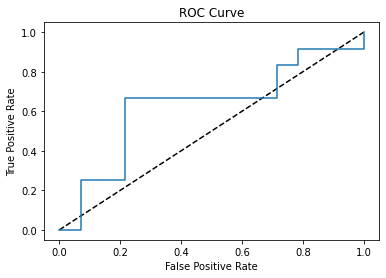

In [31]:
evaluate(rfc, X_train, X_test, y_train, y_test)

In [32]:
df_cols = customer_data[:0]
df_cols = df_cols.drop(['Happy'], axis = 1 )
df_cols.columns

Index(['DeliveredOnTime', 'ContentsCorrect', 'I ordered everything',
       'GoodPrice', 'CourierSatisfaction', 'AppEasyOrdering', 'AvgSurvey'],
      dtype='object')

<AxesSubplot:>

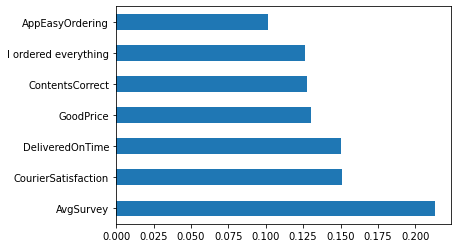

In [33]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_,index=df_cols.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [34]:
for item1,item2 in sorted(zip(rfc.best_estimator_.named_steps['rfc'].feature_importances_,df_cols.columns),reverse=True):
    print(f'{item2} has a score of {item1}')

AvgSurvey has a score of 0.21321592143414486
CourierSatisfaction has a score of 0.1511553342244229
DeliveredOnTime has a score of 0.15012729368448202
GoodPrice has a score of 0.13037680253849512
ContentsCorrect has a score of 0.12748334084542984
I ordered everything has a score of 0.12636985223483688
AppEasyOrdering has a score of 0.10127145503818853


In [35]:
# Instantiate and fit the random forest model. 
rf = RandomForestClassifier().fit(X_train, y_train) 
# Explore feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
AvgSurvey,0.223964
DeliveredOnTime,0.148078
CourierSatisfaction,0.142882
ContentsCorrect,0.132280
GoodPrice,0.126802
I ordered everything,0.124305
AppEasyOrdering,0.101688


### Recursive Feature Elimination - Check Rank values 1 thru 5



In [36]:
# feature extraction, Random Forest

rfe = RFE(rf, 5)
fit = rfe.fit(X_train, y_train)
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
0,DeliveredOnTime,1
1,ContentsCorrect,1
3,GoodPrice,1
4,CourierSatisfaction,1
6,AvgSurvey,1
2,I ordered everything,2
5,AppEasyOrdering,3


In [37]:
rfe = RFE(rf, 4)
fit = rfe.fit(X_train, y_train)
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,ContentsCorrect,1
3,GoodPrice,1
4,CourierSatisfaction,1
6,AvgSurvey,1
0,DeliveredOnTime,2
2,I ordered everything,3
5,AppEasyOrdering,4


In [38]:
rfe = RFE(rf, 3)
fit = rfe.fit(X_train, y_train)
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,ContentsCorrect,1
4,CourierSatisfaction,1
6,AvgSurvey,1
0,DeliveredOnTime,2
3,GoodPrice,3
2,I ordered everything,4
5,AppEasyOrdering,5


In [39]:
rfe = RFE(rf, 2)
fit = rfe.fit(X_train, y_train)
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,ContentsCorrect,1
6,AvgSurvey,1
4,CourierSatisfaction,2
3,GoodPrice,3
0,DeliveredOnTime,4
2,I ordered everything,5
5,AppEasyOrdering,6


In [40]:
rfe = RFE(rf, 1)
fit = rfe.fit(X_train, y_train)
selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
6,AvgSurvey,1
1,ContentsCorrect,2
4,CourierSatisfaction,3
0,DeliveredOnTime,4
2,I ordered everything,5
3,GoodPrice,6
5,AppEasyOrdering,7


In [41]:
# drop the 'easy_ordering_app' feature from train and test set
X_train_rfe = X_train.drop(columns=['AppEasyOrdering'])
X_test_rfe = X_test.drop(columns=['AppEasyOrdering'])

In [42]:
rfc.fit(X_train_rfe, y_train)

rfc_predict = rfc.predict(X_test_rfe)


COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


In [43]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,I ordered everything,GoodPrice,CourierSatisfaction,AvgSurvey
1,0,-1,0,2,1,0.333333
110,2,0,0,1,1,1.000000
58,2,0,2,2,1,1.500000
102,2,-1,0,0,0,0.500000
73,2,-1,0,0,-1,0.333333
...,...,...,...,...,...,...
23,2,-2,-1,2,-1,0.166667
13,1,-1,1,2,1,0.666667
11,1,1,0,1,1,0.833333
28,0,0,-2,0,0,-0.166667


### After removing the lowest ranked feature, the improvement is not conclusive compared to the default model without adjustments. Removing a second feature is also inconclusive.  

TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.5833
ACCURACY SCORE:0.5385
CONFUSION MATRIX:
[[7 7]
 [5 7]]
F1-score:  0.5385
Test ROC AUC: 0.5119 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.583333   0.500000  0.538462   0.541667      0.544872
recall      0.500000   0.583333  0.538462   0.541667      0.538462
f1-score    0.538462   0.538462  0.538462   0.538462      0.538462
support    14.000000  12.000000  0.538462  26.000000     26.000000


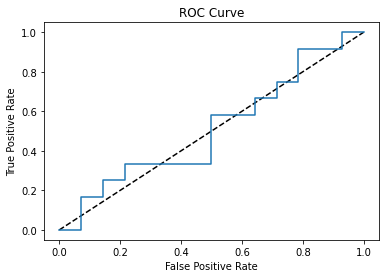

In [44]:
evaluate(rfc, X_train_rfe, X_test_rfe, y_train, y_test)

In [45]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,I ordered everything,GoodPrice,CourierSatisfaction,AvgSurvey
1,0,-1,0,2,1,0.333333
110,2,0,0,1,1,1.000000
58,2,0,2,2,1,1.500000
102,2,-1,0,0,0,0.500000
73,2,-1,0,0,-1,0.333333
...,...,...,...,...,...,...
23,2,-2,-1,2,-1,0.166667
13,1,-1,1,2,1,0.666667
11,1,1,0,1,1,0.833333
28,0,0,-2,0,0,-0.166667


In [46]:
feature_importances = pd.DataFrame(rfc.best_estimator_.named_steps["rfc"].feature_importances_,
                                   index = X_train_rfe.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
AvgSurvey,0.233919
CourierSatisfaction,0.167456
DeliveredOnTime,0.163590
GoodPrice,0.152433
ContentsCorrect,0.144072
I ordered everything,0.138530


In [47]:
# drop the 'easy_ordering_app' feature from train and test set
X_train_rfe = X_train.drop(columns=['AppEasyOrdering','I ordered everything'])
X_test_rfe = X_test.drop(columns=['AppEasyOrdering','I ordered everything'])

In [48]:
rfc.fit(X_train_rfe, y_train)

rfc_predict = rfc.predict(X_test_rfe)


COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.5833
ACCURACY SCORE:0.5000
CONFUSION MATRIX:
[[6 8]
 [5 7]]
F1-score:  0.5185
Test ROC AUC: 0.5655 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.545455   0.466667       0.5   0.506061      0.509091
recall      0.428571   0.583333       0.5   0.505952      0.500000
f1-score    0.480000   0.518519       0.5   0.499259      0.497778
support    14.000000  12.000000       0.5  26.000000     26.000000


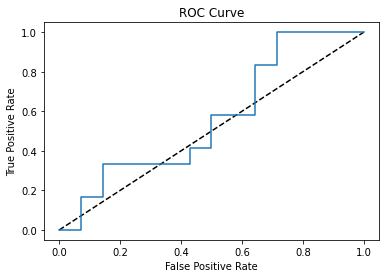

In [49]:
evaluate(rfc, X_train_rfe, X_test_rfe, y_train, y_test)

In [50]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,GoodPrice,CourierSatisfaction,AvgSurvey
1,0,-1,2,1,0.333333
110,2,0,1,1,1.000000
58,2,0,2,1,1.500000
102,2,-1,0,0,0.500000
73,2,-1,0,-1,0.333333
...,...,...,...,...,...
23,2,-2,2,-1,0.166667
13,1,-1,2,1,0.666667
11,1,1,1,1,0.833333
28,0,0,0,0,-0.166667


In [51]:
feature_importances = pd.DataFrame(rfc.best_estimator_.named_steps["rfc"].feature_importances_,
                                   index = X_train_rfe.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
AvgSurvey,0.311464
ContentsCorrect,0.176555
DeliveredOnTime,0.176499
GoodPrice,0.174638
CourierSatisfaction,0.160844


In [52]:
%%time
# RUN THE PIPELINE WITH DEFAULT PARAMETERS BEFORE USING STANDARD SCALER
# Setup the pipeline
steps = [
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

#steps = [('scaler', StandardScaler()),
#         ('rfc', RandomForestClassifier(n_estimators=10))
#         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['gini']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
#print (confusion_matrix(y_test , rfc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
#print("F1 score: ", f1_score(y_test , rfc_predict))
#print("Precision score: " , precision_score(y_test , rfc_predict))
#print("Recall score: " , recall_score(y_test , rfc_predict))
#print (classification_report(y_test , rfc_predict))
rfc

COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'gini', 'rfc__max_depth': None}
Tuned Logistic Regression Accuracy: 0.58
CPU times: user 222 ms, sys: 12.6 ms, total: 235 ms
Wall time: 716 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [53]:
# drop the 'easy_ordering_app' feature from train and test set
X_train_rfe = X_train.drop(columns=['AppEasyOrdering'])
X_test_rfe = X_test.drop(columns=['AppEasyOrdering'])

In [54]:
rfc.fit(X_train_rfe, y_train)

rfc_predict = rfc.predict(X_test_rfe)


COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


In [55]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,I ordered everything,GoodPrice,CourierSatisfaction,AvgSurvey
1,0,-1,0,2,1,0.333333
110,2,0,0,1,1,1.000000
58,2,0,2,2,1,1.500000
102,2,-1,0,0,0,0.500000
73,2,-1,0,0,-1,0.333333
...,...,...,...,...,...,...
23,2,-2,-1,2,-1,0.166667
13,1,-1,1,2,1,0.666667
11,1,1,0,1,1,0.833333
28,0,0,-2,0,0,-0.166667


TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5769
CONFUSION MATRIX:
[[7 7]
 [4 8]]
F1-score:  0.5926
Test ROC AUC: 0.5714 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.636364   0.533333  0.576923   0.584848      0.588811
recall      0.500000   0.666667  0.576923   0.583333      0.576923
f1-score    0.560000   0.592593  0.576923   0.576296      0.575043
support    14.000000  12.000000  0.576923  26.000000     26.000000


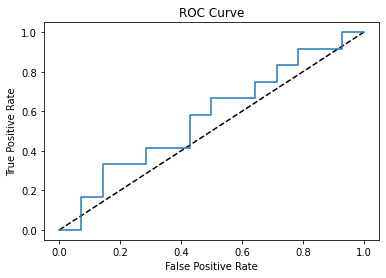

In [56]:
evaluate(rfc, X_train_rfe, X_test_rfe, y_train, y_test)

In [57]:
# drop the 'easy_ordering_app' feature from train and test set
X_train_rfe = X_train.drop(columns=['AppEasyOrdering','GoodPrice'])
X_test_rfe = X_test.drop(columns=['AppEasyOrdering','GoodPrice'])

In [58]:
rfc.fit(X_train_rfe, y_train)

rfc_predict = rfc.predict(X_test_rfe)


COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


In [59]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,I ordered everything,CourierSatisfaction,AvgSurvey
1,0,-1,0,1,0.333333
110,2,0,0,1,1.000000
58,2,0,2,1,1.500000
102,2,-1,0,0,0.500000
73,2,-1,0,-1,0.333333
...,...,...,...,...,...
23,2,-2,-1,-1,0.166667
13,1,-1,1,1,0.666667
11,1,1,0,1,0.833333
28,0,0,-2,0,-0.166667


TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.5833
ACCURACY SCORE:0.5385
CONFUSION MATRIX:
[[7 7]
 [5 7]]
F1-score:  0.5385
Test ROC AUC: 0.5506 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.583333   0.500000  0.538462   0.541667      0.544872
recall      0.500000   0.583333  0.538462   0.541667      0.538462
f1-score    0.538462   0.538462  0.538462   0.538462      0.538462
support    14.000000  12.000000  0.538462  26.000000     26.000000


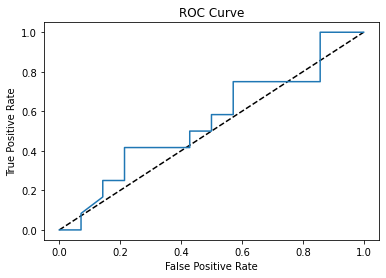

In [60]:
evaluate(rfc, X_train_rfe, X_test_rfe, y_train, y_test)

In [61]:
X_train_rfe

,DeliveredOnTime,ContentsCorrect,I ordered everything,CourierSatisfaction,AvgSurvey
1,0,-1,0,1,0.333333
110,2,0,0,1,1.000000
58,2,0,2,1,1.500000
102,2,-1,0,0,0.500000
73,2,-1,0,-1,0.333333
...,...,...,...,...,...
23,2,-2,-1,-1,0.166667
13,1,-1,1,1,0.666667
11,1,1,0,1,0.833333
28,0,0,-2,0,-0.166667


## Restore the full set of features plus Avg, before MODEL TUNING

In [62]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed_value, test_size=0.2)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 100
X Testing set sample size: 26
y Training set sample size: 100
y Testing set sample size: 26


In [63]:
%%time
# using STANDARD SCALER
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

#steps = [('scaler', StandardScaler()),
#         ('rfc', RandomForestClassifier(n_estimators=10))
#         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [None],
                'rfc__class_weight': [None],
                 'rfc__criterion' : ['gini']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
#print (confusion_matrix(y_test , rfc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
#print("F1 score: ", f1_score(y_test , rfc_predict))
#print("Precision score: " , precision_score(y_test , rfc_predict))
#print("Recall score: " , recall_score(y_test , rfc_predict))
#print (classification_report(y_test , rfc_predict))
rfc

COMET ERROR: Failed to extract parameters from estimator


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Tuned Logistic Regression Parameter: {'rfc__class_weight': None, 'rfc__criterion': 'gini', 'rfc__max_depth': None}
Tuned Logistic Regression Accuracy: 0.6000000000000001
CPU times: user 268 ms, sys: 17.3 ms, total: 285 ms
Wall time: 810 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                              

TRAINIG RESULTS: 
RECALL SCORE:0.9649
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[39  4]
 [ 2 55]]
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.951220   0.932203      0.94    0.941711      0.940380
recall      0.906977   0.964912      0.94    0.935945      0.940000
f1-score    0.928571   0.948276      0.94    0.938424      0.939803
support    43.000000  57.000000      0.94  100.000000    100.000000


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5000
CONFUSION MATRIX:
[[5 9]
 [4 8]]
F1-score:  0.5517
Test ROC AUC: 0.5774 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.555556   0.470588       0.5   0.513072      0.516340
recall      0.357143   0.666667       0.5   0.511905      0.500000
f1-score    0.434783   0.551724       0.5   0.493253      0.488756
support    14.000000  12.000000       0.5  26.000000     26.000000


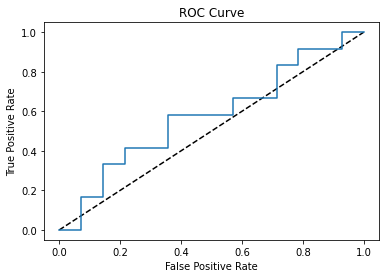

In [64]:
evaluate(rfc, X_train, X_test, y_train, y_test)

## Use GridSearchCV to evaluate different parameter values. Using the selected parameters has a positive impact on RECALL for the TEST SET, which looks promising despite some variability in training set. This type of result indicates an improvement in model fit. To recap, the final model includes the Average as an additonal feature and does not remove any orginal features. The survey results are shifted to be centered around 0, so scores includes negative numbers. Standard scaler is used in combination with Gridsearch to improve model performance.

In [65]:
%%time
# using STANDARD SCALER
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=100))
         ]

#steps = [('scaler', StandardScaler()),
#         ('rfc', RandomForestClassifier(n_estimators=10))
#         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rfc__max_depth': [1, 10, 20, 30, 50, None],
                'rfc__class_weight': [None, 'balanced'],
                 'rfc__criterion' : ['gini', 'entropy']}



# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rfc.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
#print (confusion_matrix(y_test , rfc_predict))
#print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
#print("F1 score: ", f1_score(y_test , rfc_predict))
#print("Precision score: " , precision_score(y_test , rfc_predict))
#print("Recall score: " , recall_score(y_test , rfc_predict))
#print (classification_report(y_test , rfc_predict))
rfc

COMET ERROR: Failed to extract parameters from estimator
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Tuned Logistic Regression Parameter: {'rfc__class_weight': 'balanced', 'rfc__criterion': 'entropy', 'rfc__max_depth': None}
Tuned Logistic Regression Accuracy: 0.65
CPU times: user 1.28 s, sys: 63.2 ms, total: 1.34 s
Wall time: 13.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                              

TRAINIG RESULTS: 
RECALL SCORE:0.9474
ACCURACY SCORE:0.9400
CONFUSION MATRIX:
[[40  3]
 [ 3 54]]
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.930233   0.947368      0.94     0.9388          0.94
recall      0.930233   0.947368      0.94     0.9388          0.94
f1-score    0.930233   0.947368      0.94     0.9388          0.94
support    43.000000  57.000000      0.94   100.0000        100.00


TESTING RESULTS: 
RECALL SCORE:0.6667
ACCURACY SCORE:0.5769
CONFUSION MATRIX:
[[7 7]
 [4 8]]
F1-score:  0.5926
Test ROC AUC: 0.5595 

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.636364   0.533333  0.576923   0.584848      0.588811
recall      0.500000   0.666667  0.576923   0.583333      0.576923
f1-score    0.560000   0.592593  0.576923   0.576296      0.575043
support    14.000000  12.000000  0.576923  26.000000     26.000000


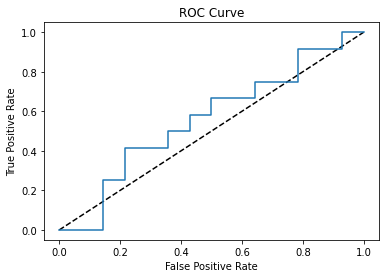

In [66]:
evaluate(rfc, X_train, X_test, y_train, y_test)

## End the Comet ML experiment

In [67]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/cruzer42/happycust/89abfd5977ea4c55807d7bae29c21bc7
COMET INFO:   Parameters:
COMET INFO:     bootstrap                     : True
COMET INFO:     ccp_alpha                     : 0.0
COMET INFO:     class_weight                  : balanced
COMET INFO:     copy                          : True
COMET INFO:     criterion                     : entropy
COMET INFO:     cv                            : 5
COMET INFO:     error_score                   : nan
COMET INFO:     estimator                     : Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                      